In [6]:
import anndata as ad
import numpy as np
import scanpy as sc

import tacco

In [7]:
adata_sp = ad.read_h5ad('task_ist_preprocessing/resources_test/task_ist_preprocessing/mouse_brain_combined/spatial_normalized_counts.h5ad')
adata_sc = ad.read_h5ad('task_ist_preprocessing/resources_test/task_ist_preprocessing/mouse_brain_combined/scrnaseq_reference.h5ad')

In [8]:
adata_sp.X = adata_sp.layers["counts"].toarray()
adata_sc.X = adata_sc.layers["counts"].toarray()

# Remove cell types with only 1 or 2 cells
ct_cell_counts = adata_sc.obs.cell_type.value_counts()
cts = ct_cell_counts.loc[ct_cell_counts > 2].index
adata_sc = adata_sc[adata_sc.obs.cell_type.isin(cts)]

1 3
Starting preprocessing
Finished preprocessing in 0.01 seconds.
Starting annotation of data with shape (1003, 131) and a reference of shape (391, 131) using the following wrapped method:
+- platform normalization: platform_iterations=0, gene_keys=cell_type, normalize_to=adata
   +- multi center: multi_center=None multi_center_amplitudes=True
      +- bisection boost: bisections=1, bisection_divisor=3
         +- core: method=OT annotation_prior=None
mean,std( rescaling(gene) )  67.21764576382269 230.24432620795733
bisection run on 1
bisection run on 0.6666666666666667
bisection run on 0.33333333333333337
Finished annotation in 0.69 seconds.


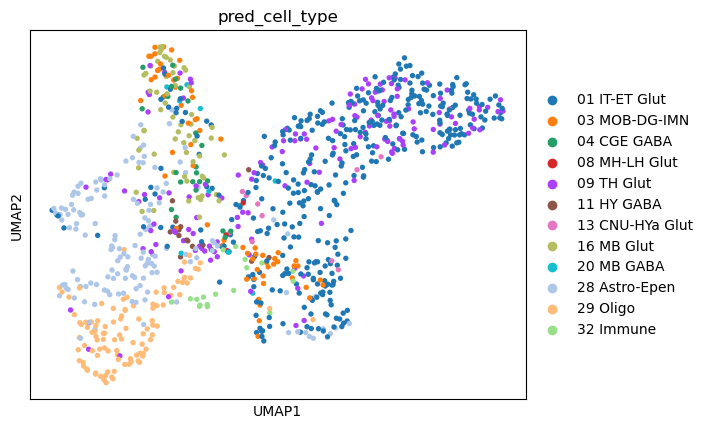

2 3
Starting preprocessing
Finished preprocessing in 0.01 seconds.
Starting annotation of data with shape (1003, 131) and a reference of shape (391, 131) using the following wrapped method:
+- platform normalization: platform_iterations=0, gene_keys=cell_type, normalize_to=adata
   +- multi center: multi_center=None multi_center_amplitudes=True
      +- bisection boost: bisections=2, bisection_divisor=3
         +- core: method=OT annotation_prior=None
mean,std( rescaling(gene) )  67.21764576382269 230.24432620795733
bisection run on 1
bisection run on 0.6666666666666667
bisection run on 0.4444444444444444
bisection run on 0.2222222222222222
Finished annotation in 0.7 seconds.


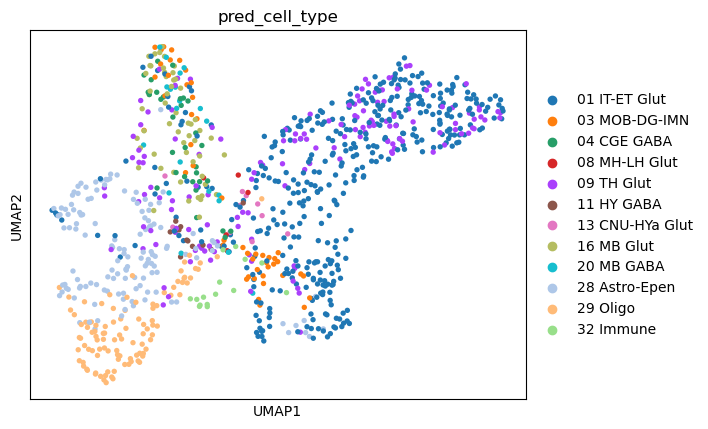

3 3
Starting preprocessing
Finished preprocessing in 0.01 seconds.
Starting annotation of data with shape (1003, 131) and a reference of shape (391, 131) using the following wrapped method:
+- platform normalization: platform_iterations=0, gene_keys=cell_type, normalize_to=adata
   +- multi center: multi_center=None multi_center_amplitudes=True
      +- bisection boost: bisections=3, bisection_divisor=3
         +- core: method=OT annotation_prior=None
mean,std( rescaling(gene) )  67.21764576382269 230.24432620795733
bisection run on 1
bisection run on 0.6666666666666667
bisection run on 0.4444444444444444
bisection run on 0.2962962962962963
bisection run on 0.14814814814814814
Finished annotation in 0.86 seconds.


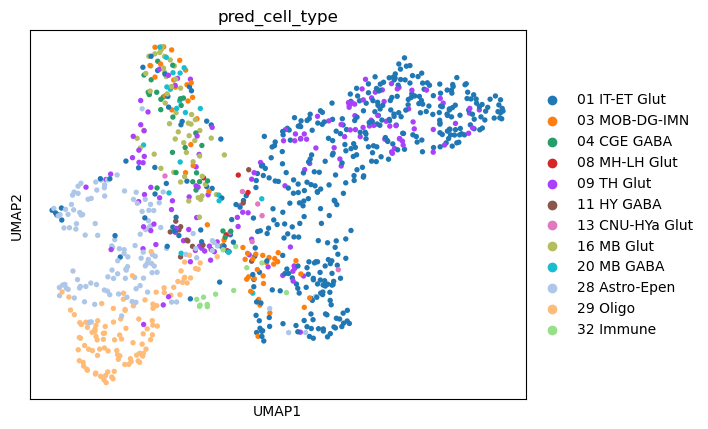

4 3
Starting preprocessing
Finished preprocessing in 0.01 seconds.
Starting annotation of data with shape (1003, 131) and a reference of shape (391, 131) using the following wrapped method:
+- platform normalization: platform_iterations=0, gene_keys=cell_type, normalize_to=adata
   +- multi center: multi_center=None multi_center_amplitudes=True
      +- bisection boost: bisections=4, bisection_divisor=3
         +- core: method=OT annotation_prior=None
mean,std( rescaling(gene) )  67.21764576382269 230.24432620795733
bisection run on 1
bisection run on 0.6666666666666667
bisection run on 0.4444444444444444
bisection run on 0.2962962962962963
bisection run on 0.19753086419753085
bisection run on 0.09876543209876543
Finished annotation in 1.03 seconds.


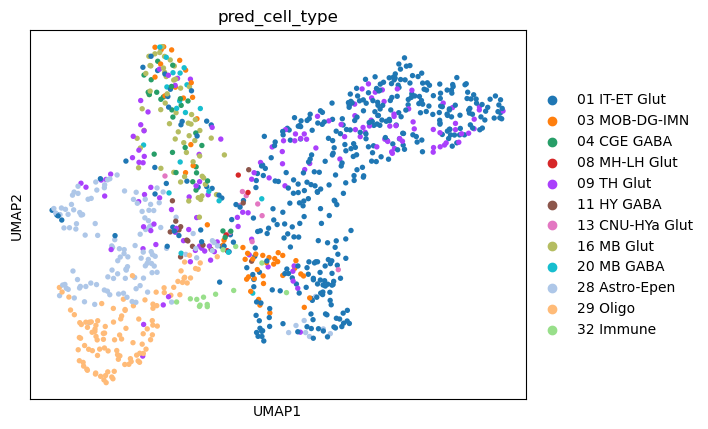

5 3
Starting preprocessing
Finished preprocessing in 0.01 seconds.
Starting annotation of data with shape (1003, 131) and a reference of shape (391, 131) using the following wrapped method:
+- platform normalization: platform_iterations=0, gene_keys=cell_type, normalize_to=adata
   +- multi center: multi_center=None multi_center_amplitudes=True
      +- bisection boost: bisections=5, bisection_divisor=3
         +- core: method=OT annotation_prior=None
mean,std( rescaling(gene) )  67.21764576382269 230.24432620795733
bisection run on 1
bisection run on 0.6666666666666667
bisection run on 0.4444444444444444
bisection run on 0.2962962962962963
bisection run on 0.19753086419753085
bisection run on 0.13168724279835387
bisection run on 0.06584362139917688
Finished annotation in 1.11 seconds.


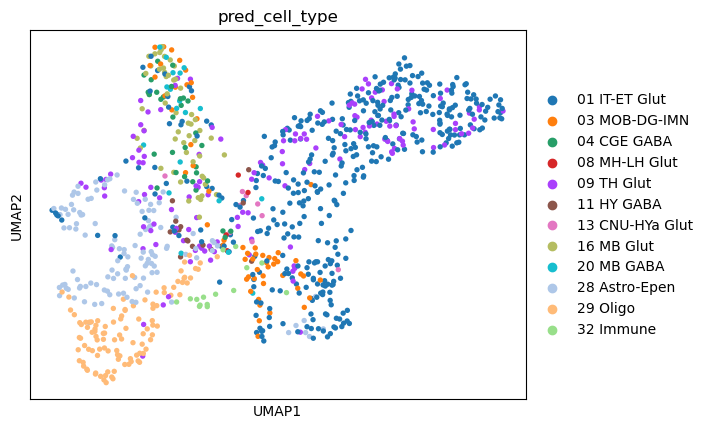

In [17]:
for bisections in [1, 2, 3, 4, 5]:
    for bisection_divisor in [3]:
        print(bisections, bisection_divisor)
        adata_sp_copy = adata_sp.copy()
        adata_sp_annotated = tacco.tl.annotate(
            adata=adata_sp_copy,
            reference=adata_sc,
            annotation_key="cell_type",
            result_key="pred_cell_type",
            bisections=bisections,
            bisection_divisor=bisection_divisor,
        )

        cell_types = adata_sp_annotated.obsm["pred_cell_type"].columns
        highest_score = np.argmax(adata_sp_annotated.obsm["pred_cell_type"], axis=1)
        adata_sp_annotated.obs["pred_cell_type"] = cell_types[highest_score]

        sc.tl.pca(adata_sp_annotated)
        sc.pp.neighbors(adata_sp_annotated)
        sc.tl.umap(adata_sp_annotated)
        sc.pl.umap(adata_sp_annotated, color="pred_cell_type", size=60)

5 2
Starting preprocessing
Finished preprocessing in 0.01 seconds.
Starting annotation of data with shape (1003, 131) and a reference of shape (391, 131) using the following wrapped method:
+- platform normalization: platform_iterations=0, gene_keys=cell_type, normalize_to=adata
   +- multi center: multi_center=None multi_center_amplitudes=True
      +- bisection boost: bisections=5, bisection_divisor=2
         +- core: method=OT annotation_prior=None
mean,std( rescaling(gene) )  67.21764576382269 230.24432620795733
bisection run on 1
bisection run on 0.5
bisection run on 0.25
bisection run on 0.125
bisection run on 0.0625
bisection run on 0.03125
Finished annotation in 1.03 seconds.


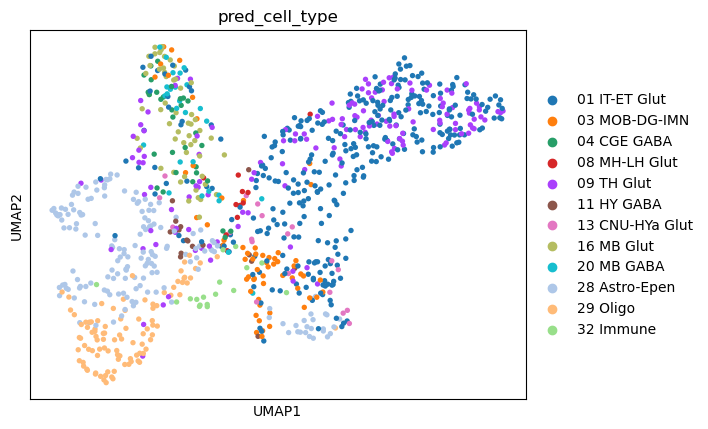

5 3
Starting preprocessing
Finished preprocessing in 0.01 seconds.
Starting annotation of data with shape (1003, 131) and a reference of shape (391, 131) using the following wrapped method:
+- platform normalization: platform_iterations=0, gene_keys=cell_type, normalize_to=adata
   +- multi center: multi_center=None multi_center_amplitudes=True
      +- bisection boost: bisections=5, bisection_divisor=3
         +- core: method=OT annotation_prior=None
mean,std( rescaling(gene) )  67.21764576382269 230.24432620795733
bisection run on 1
bisection run on 0.6666666666666667
bisection run on 0.4444444444444444
bisection run on 0.2962962962962963
bisection run on 0.19753086419753085
bisection run on 0.13168724279835387
bisection run on 0.06584362139917688
Finished annotation in 1.55 seconds.


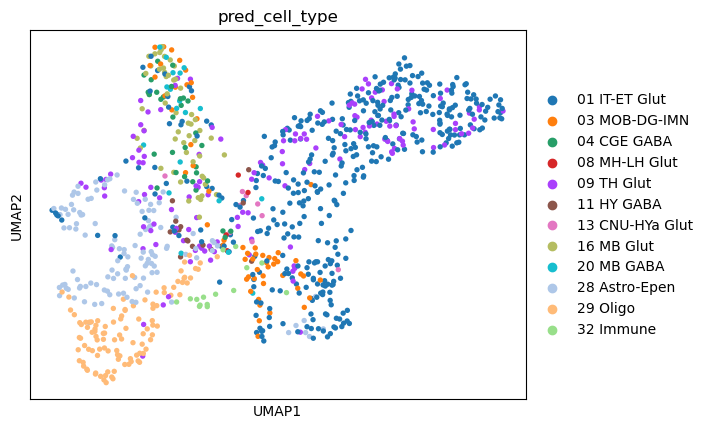

5 4
Starting preprocessing
Finished preprocessing in 0.01 seconds.
Starting annotation of data with shape (1003, 131) and a reference of shape (391, 131) using the following wrapped method:
+- platform normalization: platform_iterations=0, gene_keys=cell_type, normalize_to=adata
   +- multi center: multi_center=None multi_center_amplitudes=True
      +- bisection boost: bisections=5, bisection_divisor=4
         +- core: method=OT annotation_prior=None
mean,std( rescaling(gene) )  67.21764576382269 230.24432620795733
bisection run on 1
bisection run on 0.75
bisection run on 0.5625
bisection run on 0.421875
bisection run on 0.31640625
bisection run on 0.2373046875
bisection run on 0.158203125
bisection run on 0.0791015625
Finished annotation in 1.45 seconds.


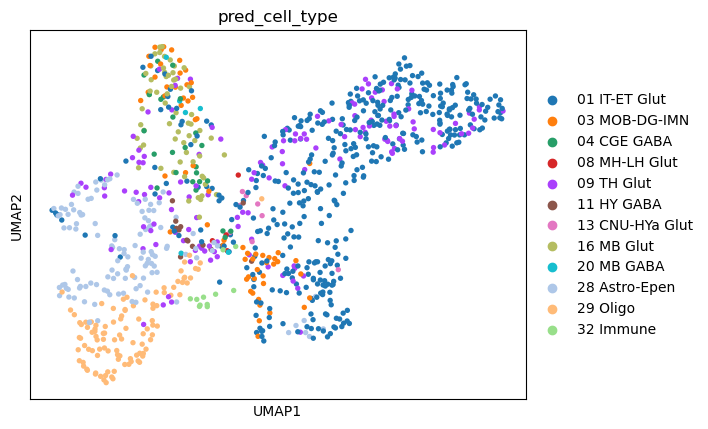

5 5
Starting preprocessing
Finished preprocessing in 0.01 seconds.
Starting annotation of data with shape (1003, 131) and a reference of shape (391, 131) using the following wrapped method:
+- platform normalization: platform_iterations=0, gene_keys=cell_type, normalize_to=adata
   +- multi center: multi_center=None multi_center_amplitudes=True
      +- bisection boost: bisections=5, bisection_divisor=5
         +- core: method=OT annotation_prior=None
mean,std( rescaling(gene) )  67.21764576382269 230.24432620795733
bisection run on 1
bisection run on 0.8
bisection run on 0.64
bisection run on 0.512
bisection run on 0.40959999999999996
bisection run on 0.32767999999999997
bisection run on 0.24575999999999998
bisection run on 0.16383999999999999
bisection run on 0.08191999999999999
Finished annotation in 1.47 seconds.


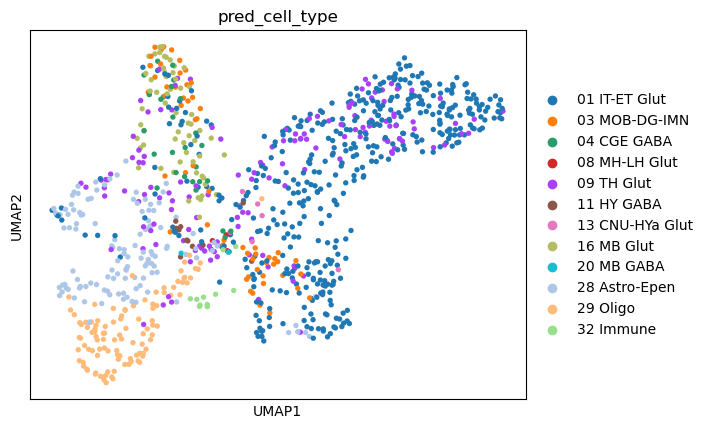

In [19]:
for bisection  in [2]:
    for bisection_divisor in [2, 3, 4, 5]:
        print(bisections, bisection_divisor)
        adata_sp_copy = adata_sp.copy()
        adata_sp_annotated = tacco.tl.annotate(
            adata=adata_sp_copy,
            reference=adata_sc,
            annotation_key="cell_type",
            result_key="pred_cell_type",
            bisections=bisections,
            bisection_divisor=bisection_divisor,
        )

        cell_types = adata_sp_annotated.obsm["pred_cell_type"].columns
        highest_score = np.argmax(adata_sp_annotated.obsm["pred_cell_type"], axis=1)
        adata_sp_annotated.obs["pred_cell_type"] = cell_types[highest_score]

        sc.tl.pca(adata_sp_annotated)
        sc.pp.neighbors(adata_sp_annotated)
        sc.tl.umap(adata_sp_annotated)
        sc.pl.umap(adata_sp_annotated, color="pred_cell_type", size=60)